<div style= "text-align: center"> 
    <h1>STUTERN DATA SCIENCE PROJECT</h1>
    <h5>by</h5>
    <h3> FAIZA YUSUF </h3>
    <h3> Analysis on Employee Attrition </h3>
</div>

<p> Employee attrition is the resignation of employee in their working place, voluntary or involuntary. We shall see what is the cause of attrition. </p>

In [1]:
%load_ext sql

In [2]:
%%sql 

sqlite:///db/attr_data.db

In [3]:
%reload_ext sql

In [7]:
%%sql 

PRAGMA table_info(attr_data);

 * sqlite:///db/attr_data.db
Done.


cid,name,type,notnull,dflt_value,pk


In [232]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings    # We want to suppress warnings
warnings.filterwarnings("ignore")    # Ignore warnings
# pandas settings
pd.options.display.max_rows = 2_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

In [9]:
cnx = sqlite3.connect('attr_data.db')

dataf = pd.read_sql_query("SELECT * from attrition_records", cnx)
df = dataf.copy()
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## DATA CLEANING

### checking missing values

In [10]:
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

###### COMMENT
* There is no missing values

### check duplicates values

In [11]:
df.duplicated().sum()

0

#### COMMENT
* There is no duplicate values in the dataset

In [12]:
# checking for number of rows and columns
df.shape

(1470, 36)

#### COMMENT
<p> there are <b> 1470 </b> and <b> 36 </b> columns in the dataset

In [13]:
# list of columns
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### checking for the unique values for each column

In [188]:
for column in df:
    print('No. of values for {} is {}'.format(column, df[column].nunique()))

No. of values for id is 1470
No. of values for Age is 43
No. of values for Attrition is 2
No. of values for BusinessTravel is 3
No. of values for DailyRate is 886
No. of values for Department is 3
No. of values for DistanceFromHome is 29
No. of values for Education is 5
No. of values for EducationField is 6
No. of values for EmployeeCount is 1
No. of values for EmployeeNumber is 1470
No. of values for EnvironmentSatisfaction is 4
No. of values for Gender is 2
No. of values for HourlyRate is 71
No. of values for JobInvolvement is 4
No. of values for JobLevel is 5
No. of values for JobRole is 9
No. of values for JobSatisfaction is 4
No. of values for MaritalStatus is 3
No. of values for MonthlyIncome is 1349
No. of values for MonthlyRate is 1427
No. of values for NumCompaniesWorked is 10
No. of values for Over18 is 1
No. of values for OverTime is 2
No. of values for PercentSalaryHike is 15
No. of values for PerformanceRating is 2
No. of values for RelationshipSatisfaction is 4
No. of val

#### COMMENTS:
* i will drop  EmployeeCount , Over18 , and StandardHours  because they have one unique value 
* and i will also drop id and  EmployeeNumber  because each value is unique 

In [14]:
# dropping the four columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', "id"], axis=1,  inplace=True)

In [15]:
df.shape

(1470, 31)

<p> the number of columns has been reduced

In [16]:
# checking the infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

 <b>COMMENT:</b> All the variables has the correct data type

In [192]:
# summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


<b> COMMENTS: </b>
<li> the average age in the dataset is 36 while the minimum and maximum are 18 and 60 respectively, these shows that thee are young and as well old people in the company</li>
<li> the minimum distance from home is <b> 1</b> this shows that there are some employees that are very close to the company while some are far from the company as it is shown that the maximum is <b> 29 </b> </li>
<li> the average income for the company is <b> 8379 </b> </li>
<li> There are those who did 15 years in the company without promotion </li>
<li> there are some employees that spent 40 years in the company</li>

<h1 style= "text-align: center"> EDA </h1>

## Question one
### What do you think are the 3 factors behind employee attrition?


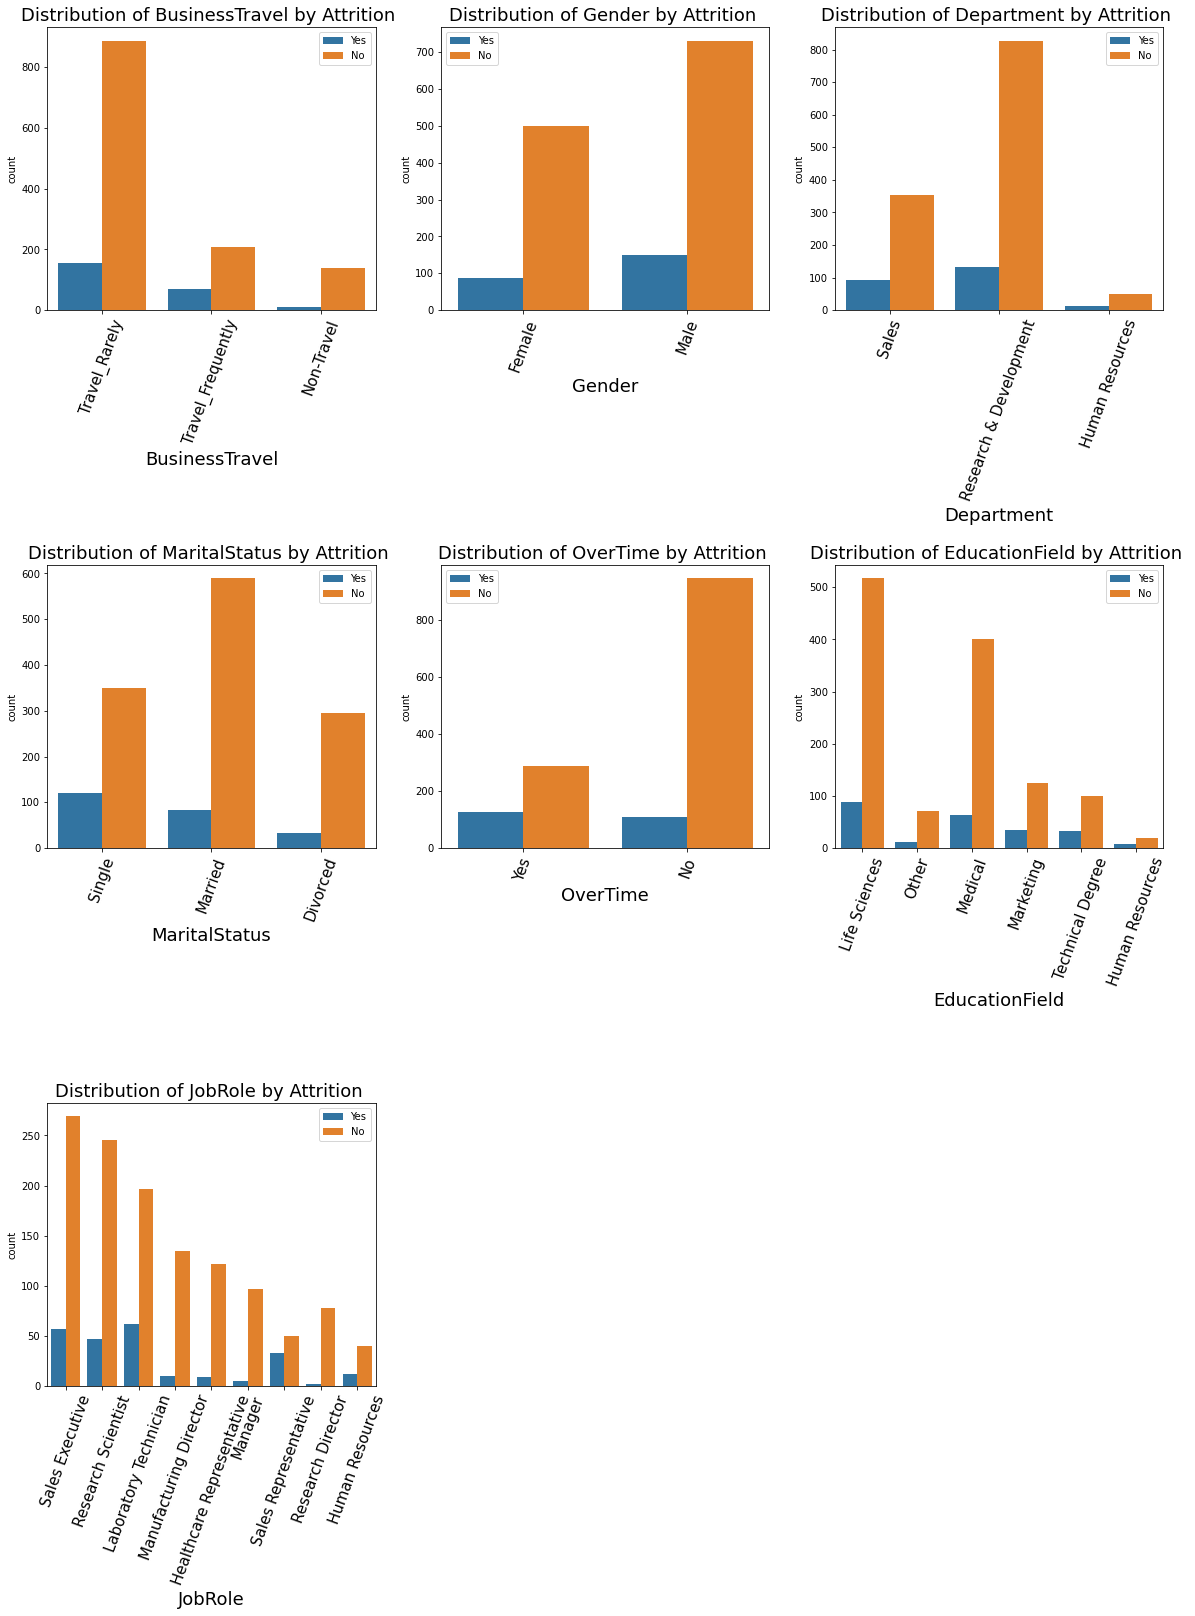

In [327]:
# let see for categorical variables
plt.figure(figsize=(20,25))
categorical_field = ['BusinessTravel','Gender','Department','MaritalStatus','OverTime','EducationField', 'JobRole']
for i, column in enumerate(categorical_field, 1):
    plt.subplot(3,3,i)
    sbn.countplot(data=df, x=column,  hue='Attrition')
    plt.title(f"Distribution of {column} by Attrition ", size=18)
    plt.xlabel(column, size=18)
    plt.legend()
    plt.tick_params(axis="x", rotation=70, labelsize=15)
    plt.subplots_adjust(hspace=0.9)

<b> COMMENT: </b>
* As seen from each chart, the number of attrition accounts for the count of each category except for marital status and over time.
* For marital status, "single" has the highest number of attrition, even though the number of married individuals is higher than that of singles.
* For over time, the number of people working overtime is fewer, yet it has the highest number of attrition compared to those who do not work overtime.

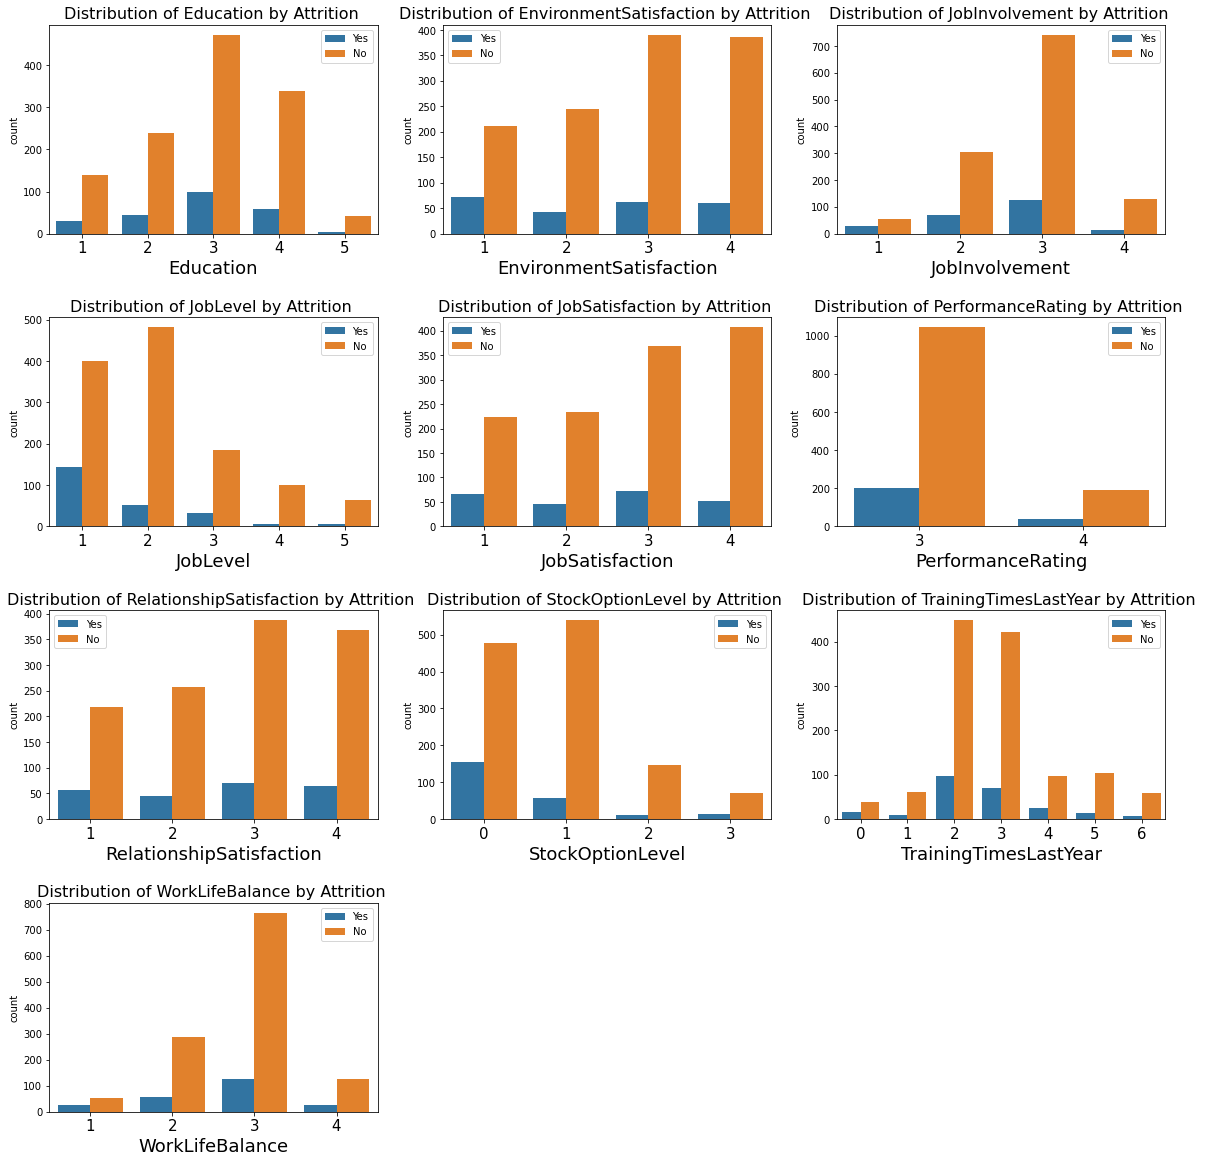

In [195]:
# let see for categorical variables
plt.figure(figsize=(20,20))
categorical_field = ['Education','EnvironmentSatisfaction', 
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
for i, column in enumerate(categorical_field, 1):
    plt.subplot(4,3,i)
    sbn.countplot(data=df, x=column,  hue='Attrition')
    plt.title(f"Distribution of {column} by Attrition ", size=16)
    plt.xlabel(column, size=18)
    plt.tick_params(axis="x", labelsize=15)
    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    plt.legend()

<b> COMMENT: </b>
* When considering job levels, it becomes apparent that there are significantly more employees in level 2 compared to those in level 1. Surprisingly, despite the higher number of employees in level 2, attrition is more pronounced in level 1. This could potentially be attributed to dissatisfaction with their current job level or the allure of seeking employment at a higher level.

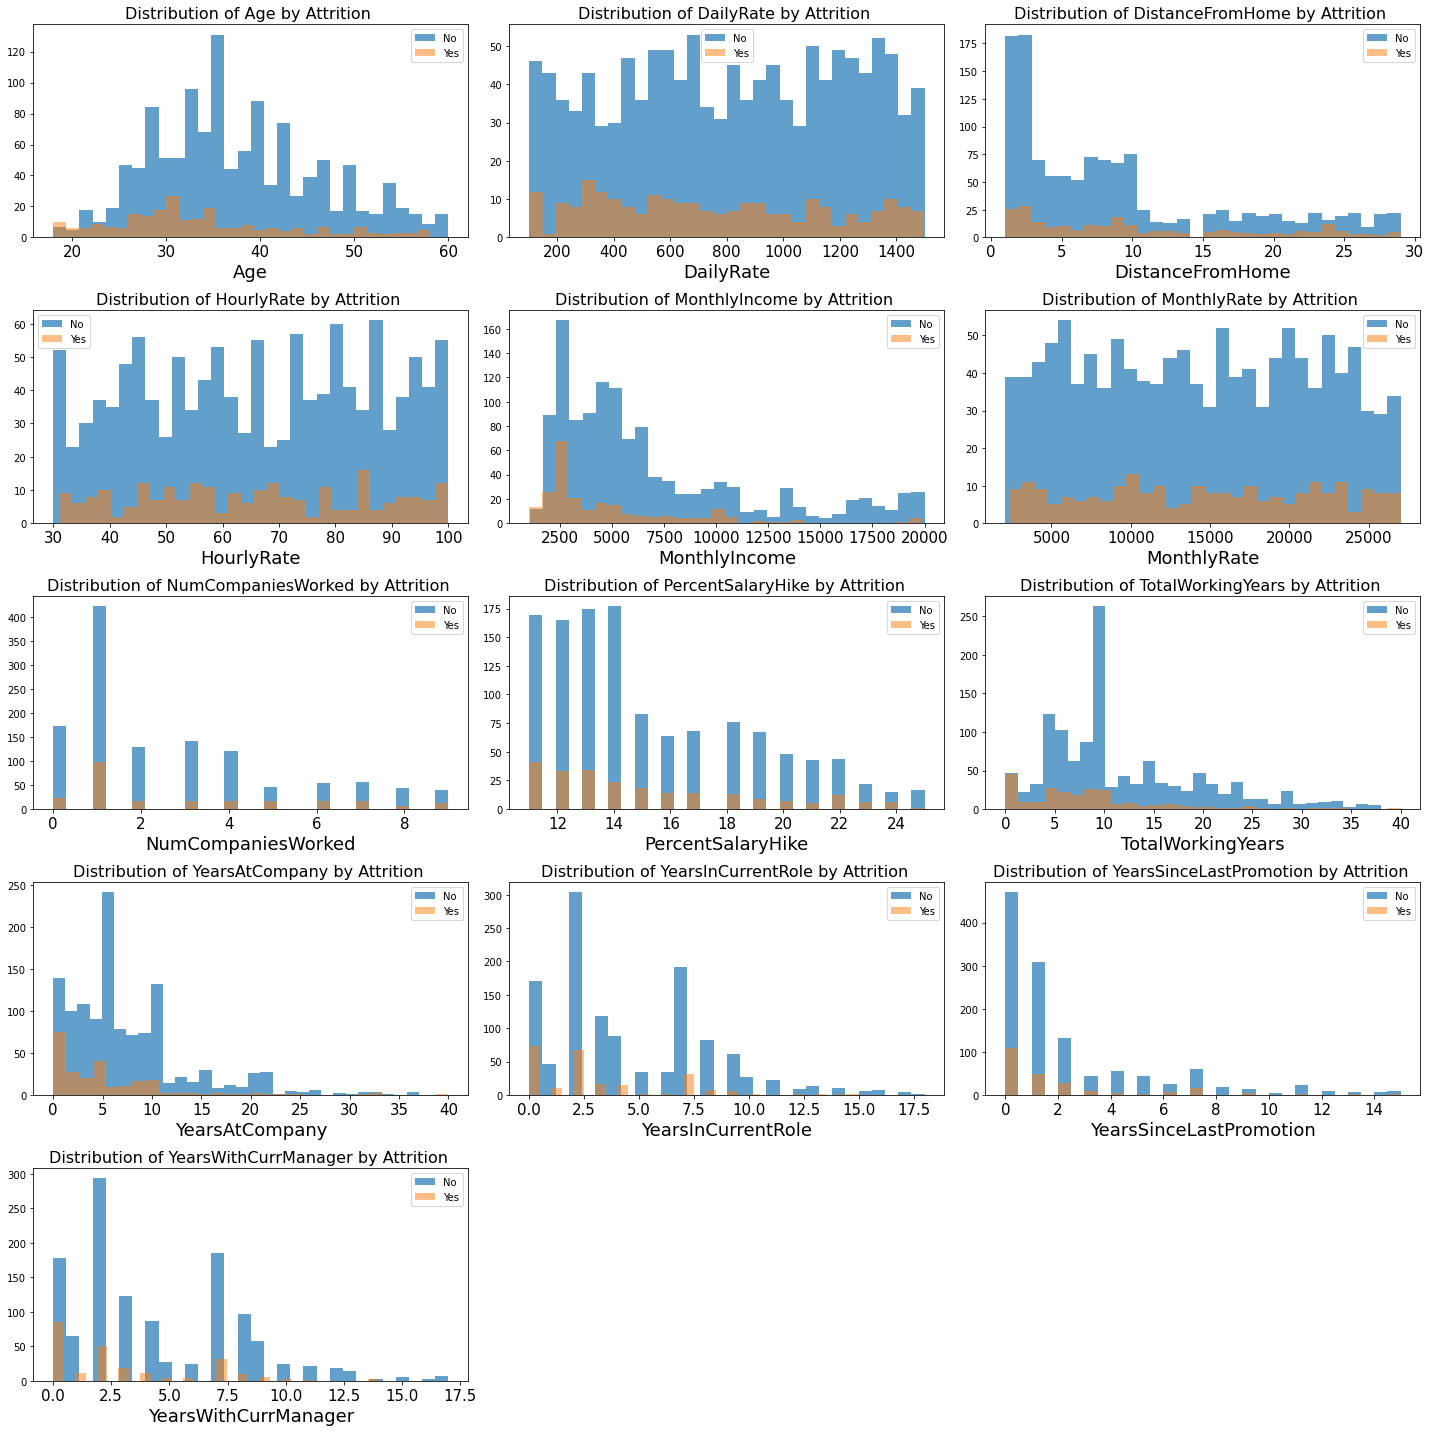

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
categorical_field = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i, column in enumerate(categorical_field, 1):
    plt.subplot(5, 3, i)
    df_yes = df[df["Attrition"] == "Yes"]
    df_no = df[df["Attrition"] == "No"]
    
    plt.hist(data=df_no, x=column, bins=30, alpha=0.7, label='No')
    plt.hist(data=df_yes, x=column, bins=30, alpha=0.5, label='Yes')
    plt.title(f"Distribution of {column} by Attrition ", size=16)
    plt.xlabel(column, size=18)
    plt.tick_params(axis="x", labelsize=15)
    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    plt.legend()
    
plt.tight_layout()
plt.show()


* from the above charts, the higher the count the higer the numbe of attrition</p>

#### I will also use statistical test to determine the most three factor, by using the top three values that are statistically significance 

In [150]:
data = df.copy()

# firstly i will encide the categorical values
Attrition_mapper = {"Yes": 1, "No":0}

BusinessTravel_mapper = {'Travel_Rarely':1,
                         'Travel_Frequently':2,
                         'Non-Travel': 0}

Department_mapper = {'Sales':1,
                     'Research & Development': 2,
                     'Human Resources':3}

EducationField_mapper = {'Life Sciences':1,
                         'Other':2,
                         'Medical':3,
                         'Marketing':4, 
                         'Technical Degree':5,
                         'Human Resources':6}

Gender_mapper = {'Female':1, 'Male':2}

JobRole_mapper = {'Sales Executive':1,
                  'Research Scientist':2,
                  'Laboratory Technician':3,
                  'Manufacturing Director':4,
                  'Healthcare Representative':5,
                  'Manager':6,
                  'Sales Representative':7, 
                  'Research Director':8,
                  'Human Resources':9}
MaritalStatus_mapper = {'Single':1,
                        'Married':2,
                        'Divorced':3}

OverTime_mapper = {'Yes':1, 'No':2}

feat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']
mapper = [Attrition_mapper, BusinessTravel_mapper, Department_mapper, EducationField_mapper, Gender_mapper,
          JobRole_mapper,MaritalStatus_mapper, OverTime_mapper]
for i, x in zip(feat, mapper):
    data[i] = data[i].map(x)
    
data.head()

In [328]:
from scipy import stats

stat_result ={"variable":[], "p-value":[] } 
    
    
numerical_vars = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
# getting the p-value
for var in numerical_vars:
    anova_result = stats.f_oneway(
        data[data['Attrition'] == 1][var],
        data[data['Attrition'] == 0][var]
    )
    p_value = anova_result.pvalue
    stat_result["variable"].append(var)
    stat_result["p-value"].append(p_value)

stat_test = pd.DataFrame(stat_result)
stat_test[stat_test["p-value"]<0.05].sort_values(by="p-value").head(3)

,variable,p-value
18,OverTime,1.009254e-21
23,TotalWorkingYears,4.061878e-11
11,JobLevel,6.795385e-11


from the statistical testing, over time, total working years and job level appears to be the most three factors behind employee attrition, even though statistical significance does not mean causation

####  Based on the analysis conducted and my domain knowledge, three main factors contributing to employee attrition are

1. Overtime: Every employee needs a work-life balance. When employees are consistently required to work overtime, they may become eager to leave their current position. Some may even leave without securing another job, while others may depart due to the inability to cope with the added stress.

2. Monthly Income: Notably, employees with lower monthly incomes are more likely to leave their jobs. This trend could be attributed to their desire to find employment opportunities offering better salary packages.

3. Job Level: An interesting observation is the higher attrition rate in level one positions. This could potentially be due to employee dissatisfaction with their current job level or their pursuit of opportunities at a higher job level.

## Question two
### What is the relationship between Education and Monthly Income?

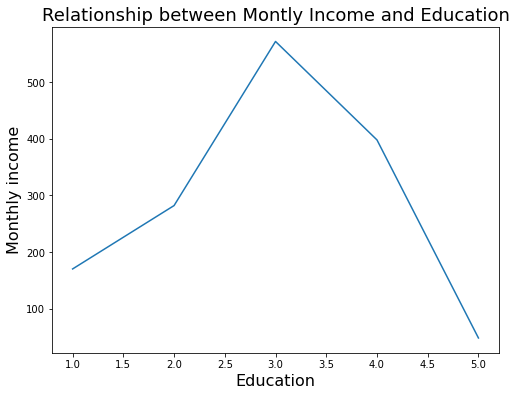

In [213]:
# let see the relationship using bar chart
v = df.groupby("Education").count()

plt.figure(figsize=(8, 6))

plt.plot(v.index, v.MonthlyIncome)
plt.xlabel("Education", size=16)
plt.ylabel("Monthly income", size=16)
plt.title("Relationship between Montly Income and Education", size=18)

plt.show()

There is an increase in income from level one to three but suddenly decreases from three to five

### Correlation test

In [217]:
# let check the relationship using correlation
df['Education'].corr(df['MonthlyIncome'])

0.09496067704188885

The result indicates that there is relationship but a very week relationship

### Statistical test

In [221]:
# Statistical Analysis - T-test for comparing means of income between education groups
edu_categories = df['Education'].unique()
grouped_data = [df[df['Education'] == edu]['MonthlyIncome'] for edu in edu_categories]
#t_stat, p_value = ttest_ind(*grouped_data)

# One-way ANOVA for comparing means of income among education groups
value_anova = stats.f_oneway(*grouped_data)
value_anova.pvalue

0.003768508926919263

The results indicate a statistically significant relationship between the two variables, monthly income and education.

#### There is a relationship between income and education, but a very low relationship. Therefore your level of education does not fully determine your income

## Question Three
### What is the effect of age on attrition? 

In [271]:
# categorize the age
condition = [(df["Age"] < 31), (df["Age"]<41), (df["Age"] < 51 ), (df["Age"] > 50)]
choice = ["<=30", "31-40", "41-50", ">50"]
df["Age_category"] = np.select(condlist=condition, choicelist=choice)

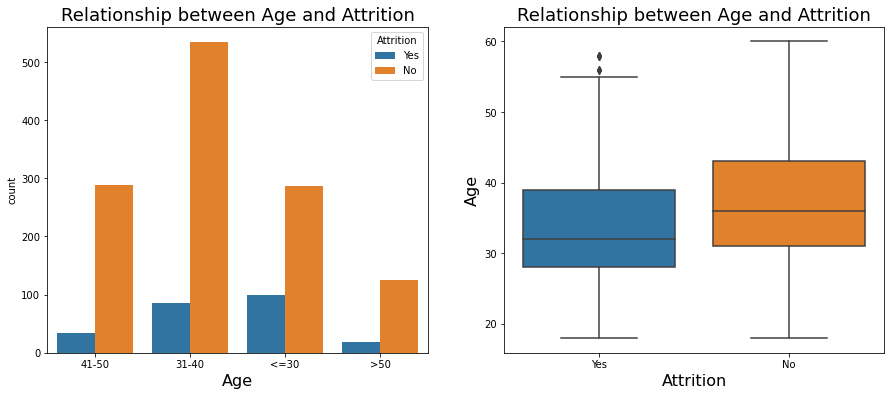

In [281]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sbn.countplot(data=df, x='Age_category',  hue='Attrition')
plt.title("Relationship between Age and Attrition", size=18)
plt.xlabel("Age", size=16)

plt.subplot(1,2,2)
sns.boxplot(data=df, y='Age', x="Attrition")
plt.title("Relationship between Age and Attrition", size=18)
plt.xlabel("Attrition", size=16)
plt.ylabel("Age", size=16)
plt.show()

<p> from the above diagrams, it clearly shown age plays a role in influencing attrition, from the first figure, employees less than 30 of age has the highest number of attrition even though it ranked second, these individuals might also be single as seen in the previuos chart. Age does affects attrition, the lower the age the higher the number of attriton </p>

### Statistical test

In [270]:
chi_sqr = pd.crosstab(index=df["Age_category"], columns=df["Attrition"])
chi_sqr_test = chi2_contingency(chi_sqr)
chi_sqr_test[1]

2.075930414618531e-08

The result also indicates that there is statistically significance relationship between the two variables, age and attrition

## Question four
### Is Income the main factor in employee attrition?

Text(0.5, 0, 'monthly income')

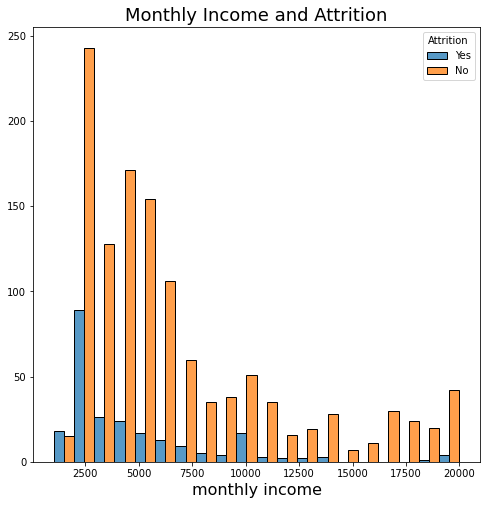

In [200]:
plt.figure(figsize=(8,8))
sbn.histplot(data=df,  x='MonthlyIncome',  hue='Attrition', fill=True, element='bars', multiple="dodge")
plt.title('Monthly Income and Attrition', size=18)
plt.ylabel('')
plt.xlabel("monthly income" , size=16)

<p> It is clearly seen that those with minimum monthly income has the highest number of attrition, and this goes more on employees earning less than 25,000 so income is also the main factor of attrition </p>

## Question Five
### How does work-life balance impact the overall attrition rate?


<Figure size 864x576 with 0 Axes>

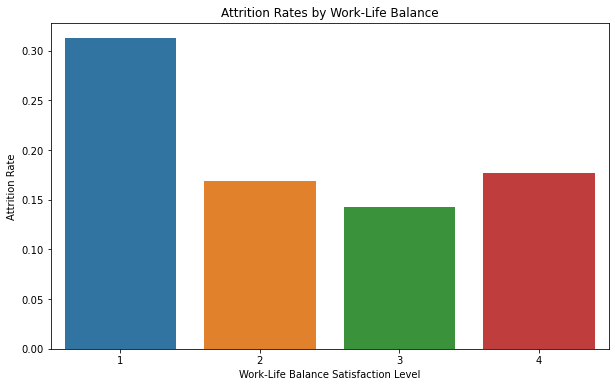

In [324]:
plt.figure(figsize=(12,8))
# Calculate attrition rates by age group (or any other category)
attrition_rates = data.groupby('WorkLifeBalance')['Attrition'].mean()

# Create a new DataFrame
attrition_df = pd.DataFrame({'worklife_grouped': attrition_rates.index, 'AttritionRate': attrition_rates.values})

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_df, x='worklife_grouped', y='AttritionRate')
plt.title("Attrition Rates by Work-Life Balance")
plt.xlabel("Work-Life Balance Satisfaction Level")
plt.ylabel("Attrition Rate")
plt.show()


<p> the work life balance has 4 stages, the above figure shows that employees with low work life balance has the highest percentage of attrition, followed by two, then three, but there is an increase in four </p>


## Conclusion
* The top three factors behind attrition are, overtime, monthly income and job level
* Others factor such as Age, yearsin current role, distance from home, etc affect employee attrition
* Employee's level of education does not fully dertermine his/her income

## Recommendation
* Organization should be hiring people above 30, research has shown that they have the highest number of attrition
* Minimize assigning too much task to employee, as it might lead to them working over time.